In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [3]:
# Step 1: Generate synthetic X
# Create two interleaving half-moon shapes
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

In [4]:
# Standardize the X (important for DBSCAN)
X = StandardScaler().fit_transform(X)

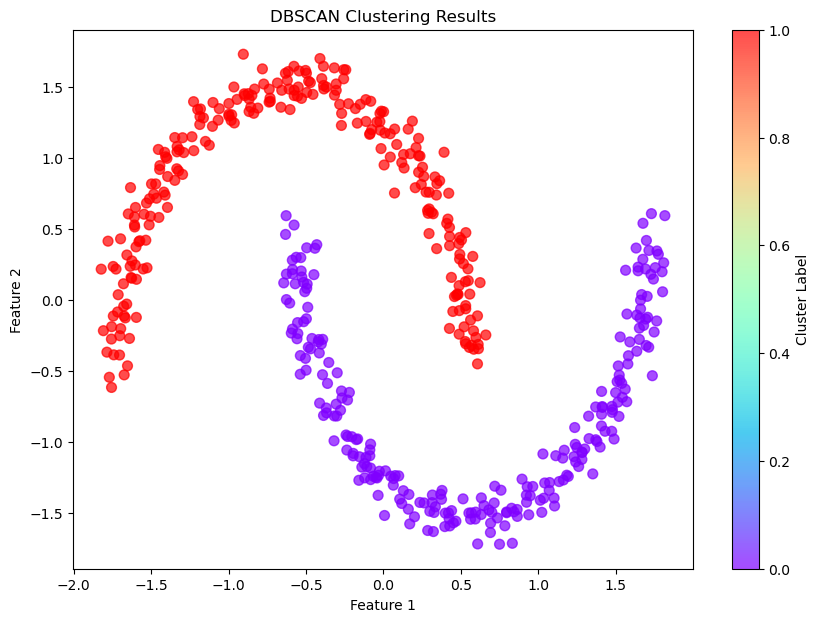

Cluster Labels: [0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1
 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0
 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1
 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0
 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1
 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1
 1 0 1 0 

In [5]:
# Step 2: Apply DBSCAN clustering
# Define DBSCAN parameters
eps = 0.3        # Maximum distance between two points to be considered neighbors
min_samples = 5  # Minimum number of points to form a dense region

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

# Step 3: Visualize the results
# Plot the clustered X
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow', s=50, alpha=0.7)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()

# Step 4: Analyze the results
# Print cluster labels (-1 indicates noise)
print("Cluster Labels:", clusters)

# Count the number of points in each cluster
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Cluster Counts:", cluster_counts)

In [15]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

# Assuming `y` is the ground truth labels and `clusters` are the DBSCAN cluster labels
ari = adjusted_rand_score(y, clusters)
homogeneity = homogeneity_score(y, clusters)
completeness = completeness_score(y, clusters)
v_measure = v_measure_score(y, clusters)

print("Adjusted Rand Index (ARI):", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-Measure:", v_measure)

Adjusted Rand Index (ARI): 1.0
Homogeneity: 1.0
Completeness: 1.0
V-Measure: 1.0
